# Individual Project Plan for DSCI 100
### By Ariel Chan

In [1]:
#run this cell before continuing
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("Individual Planning/data/players.csv")
session <- read_csv("Individual Planning/data/sessions.csv")

summary(session)
summary(players)

exp_lvls <- table(players$experience)
print(exp_lvls)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               


 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 


## Section 1: Data Description

#### players.csv
196 observations and 7 total variables in the dataset:
- experience, character
    - The level of experience each player has with Minecraft, with  5 levels: Amateur, Beginner, Pro, Regular, Veteran
    - Veteran: Players who have played for over 10 years
- subscribe, logical
    - This indicates whether the player has subscribed to the newsletter
- hashedEmail, character
- played_hours, double
- name, character
- gender, character
- Age, double

The mean playtime is 5.85 hours, while the mean age is 21.14 years.

Age, experience level, email address, and gender are collected through self-reporting when signing up, while playtime is collected through the server. 
Currently, there are no observable issues with the data.

#### sessions.csv
1535 observations and 5 variables in the dataset:
- hashedEmail, character
- start_time, character
    - Starting date and time of sessions in human-readable hours and minutes
- end_time, character
    - End date and time of sessions in human-readable hours and minutes
- original_start_time
    - Starting time as a Unix timestamp
- original_end_time
    - End time as a Unix timestamp

The mean original start and end time is 1.72e+12. These numbers do not contain any meaningful information on their own.

All data here is collected through the server. 
An issue I've noticed is the format of the start and end times, which are characters rather than numbers, making summarization difficult. On the other hand, the original times are numeric but not human-readable.

## Section 2: Questions

Broad Question: Question 2

Specific question: Does the level of experience and age of a player predict the number of hours played? 

Since the players.csv dataset contains all of the variables needed to answer this question, I can use predictive models on experience and age to predict played hours. I plan to wrangle my data by removing all other variables. This cleans up the dataset to be human-readable and enables efficient processing. I will not be using sessions.csv for my question, as all the information I'd need is in players.csv.

## Section 3: Exploratory Data Analysis and Visualization

mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


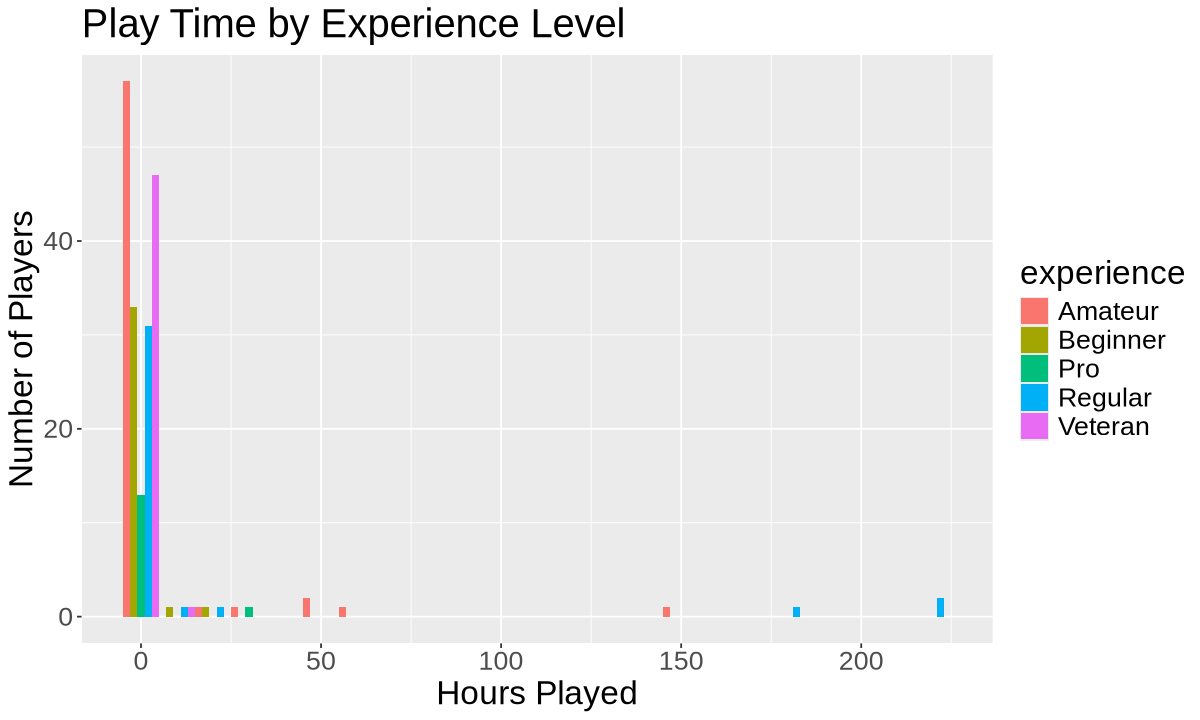

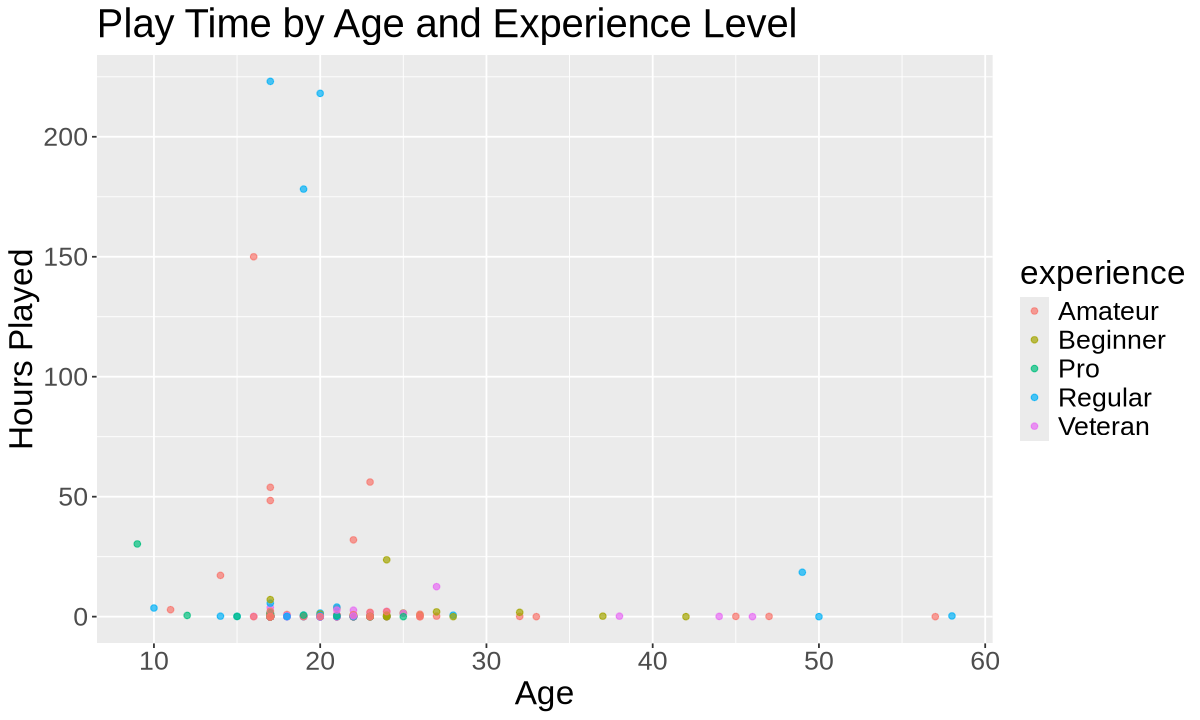

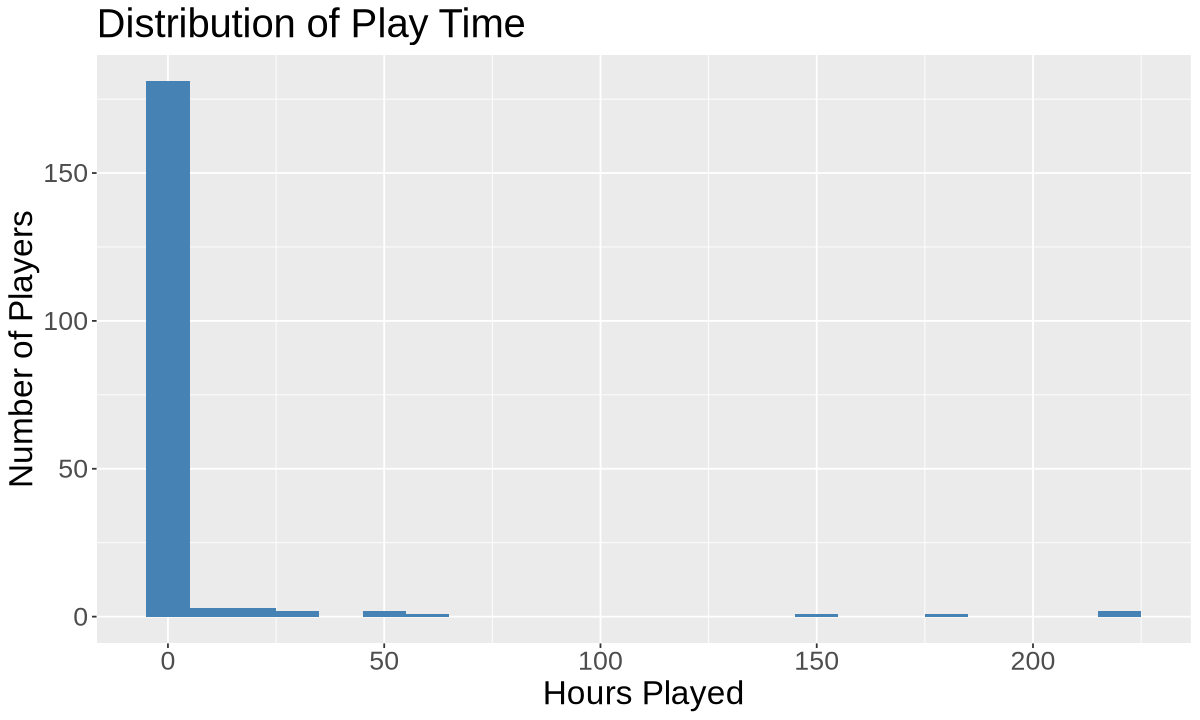

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


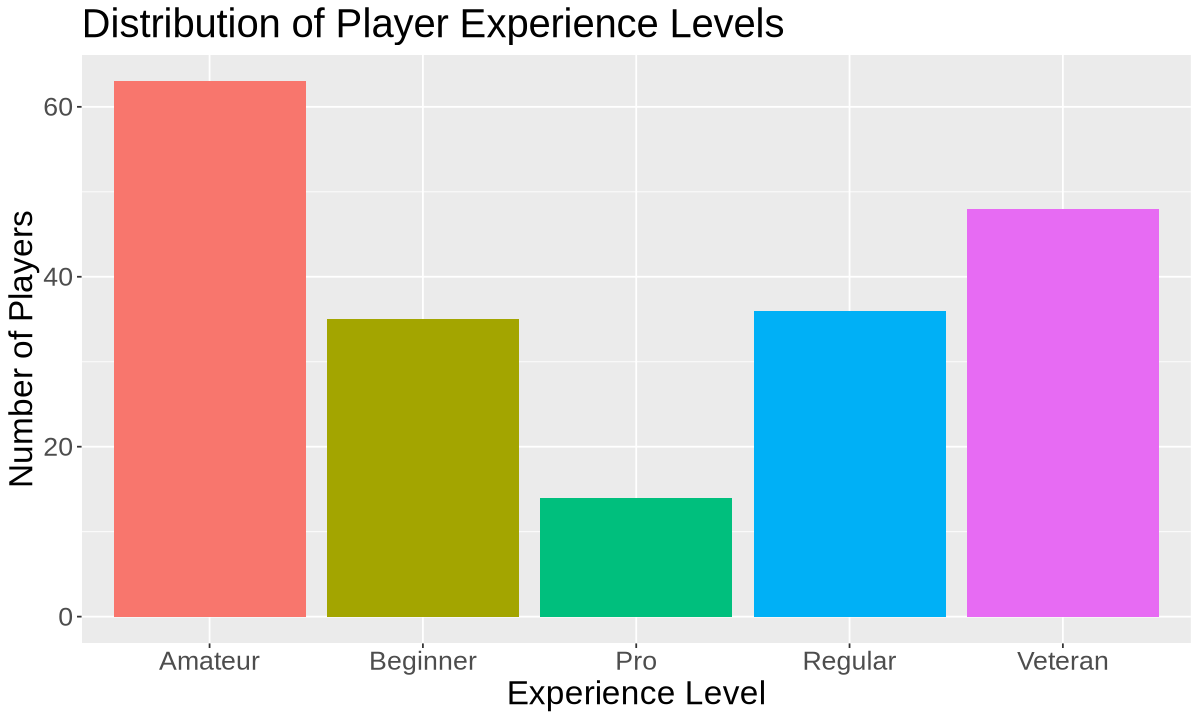

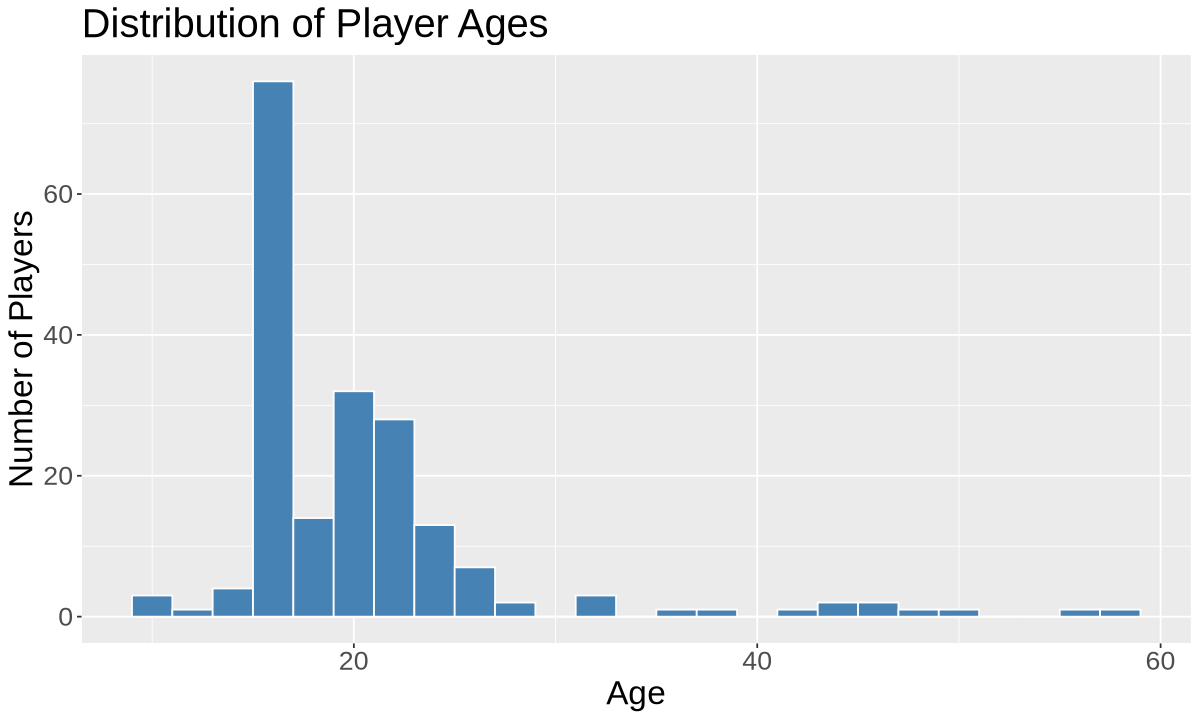

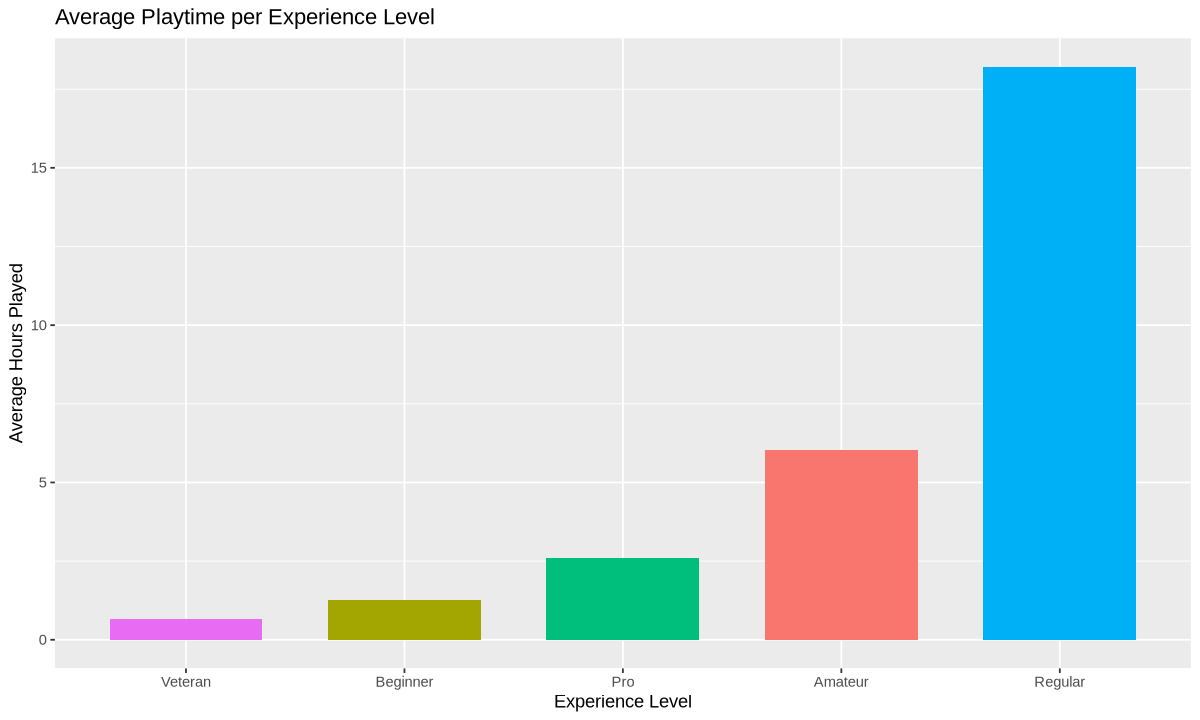

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)

summarize(players, mean_age = mean(Age, na.rm = TRUE), mean_played_hours = mean(played_hours))

players_select <- mutate(players, mean_age = mean(Age, na.rm = TRUE), mean_played_hours = mean(played_hours), age = Age) |>
                  select(mean_age, mean_played_hours, age, experience, played_hours)

playtime_exp <- ggplot(players_select, aes(x = played_hours, fill = experience)) +
                geom_histogram(binwidth = 10, position = "dodge") +
                labs(title = "Play Time by Experience Level", x = "Hours Played", y = "Number of Players") +
                theme(text = element_text(size = 20))

age_vs_playtime <- ggplot(players_select, aes(x = age, y = played_hours, color = experience)) +
                   geom_point(alpha = 0.7) +
                   labs(title = "Play Time by Age and Experience Level", x = "Age", y = "Hours Played") +
                   theme(text = element_text(size = 20))

playtime_dist <- ggplot(players_select, aes(x = played_hours)) +
                 geom_histogram(binwidth = 10, fill = "steelblue") +
                 labs(title = "Distribution of Play Time", x = "Hours Played", y = "Number of Players") +
                 theme(text = element_text(size = 20))

dist_players <- ggplot(players_select, aes(x = experience, fill = experience)) +
                geom_bar() +
                labs(title = "Distribution of Player Experience Levels", x = "Experience Level", y = "Number of Players") +
                theme(legend.position = "none",text = element_text(size = 20))

dist_age <- ggplot(players_select, aes(x = age)) +
            geom_histogram(binwidth = 2, fill = "steelblue", color = "white") +
            labs(title = "Distribution of Player Ages", x = "Age", y = "Number of Players") +
            theme(text = element_text(size = 20))

avg_exp <- group_by(players, experience) |> 
           summarise(average_playtime = mean(played_hours, na.rm = TRUE)) |>
              ggplot(aes(x = reorder(experience, average_playtime), y = average_playtime, fill = experience)) +
                  geom_col(width = 0.7) +
                  labs(title = "Average Playtime per Experience Level", x = "Experience Level", y = "Average Hours Played") +
                  theme(legend.position = "none")


playtime_exp
age_vs_playtime
playtime_dist
dist_players
dist_age
avg_exp

#### Insights
- The majority of players did not actually play, regardless of experience
    - Reduces the pool of meaningful data significantly
    - Likely that no definitive conclusions can be made
- Most players are relatively young
    - May limit the predictive strength of age
    - Scatter plot of age versus playtime suggests a mild relationship
    - Younger players log more hours
- Regulars and Amateurs are the main players


## Section 4: Methods and Plan
I'll use a multiple linear regression model because it handles a continuous outcome with both numeric (age) and categorical (experience) predictors. I'll assume linear relationships, independent observations, constant error variance, and normally distributed residuals for this.  Limitations include sensitivity to outliers and potential nonlinear patterns. I'll compare models using RMSE to assess fit and accuracy. Before modelling, I’ll split it into 70% training and 30% testing sets and then evaluate model performance using 5-fold cross-validation.